## https://www.kaggle.com/lesibius/crime-scene-exploration-and-model-fit

In [1]:
%matplotlib inline
#Basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
#Plots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#Format
from datetime import tzinfo, timedelta, datetime
#Models
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Main Preprocessing sales data
train = pd.read_csv("../data/train.csv", parse_dates=['Dates'])
test = pd.read_csv("../data/test.csv", parse_dates=['Dates'])
sampleSubmission = pd.read_csv("../data/sampleSubmission.csv")

In [3]:
train['Date']=pd.to_datetime(train['Dates'].dt.strftime('%Y-%m-%d'),format='%Y-%m-%d')
test['Date']=pd.to_datetime(test['Dates'].dt.strftime('%Y-%m-%d'),format='%Y-%m-%d')

In [4]:
# Preprocessing weather data
weather_data = pd.read_csv("../data/weather san_francisco_Jan2003-Dec15.csv")
weather_data["Date"]= weather_data["Date"].str.replace(" ", "")
weather_data["Date"] = pd.to_datetime(weather_data["Date"],format='%Y-%m-%d')

weather_data.columns = ['t_max','t_avg','t_min','dew_max','dew_avg','dew_min','hum_max',
                        'hum_avg','hum_min','wind_max','wind_avg','wind_min','pres_max','pres_avg','pres_min','percip','Date']

In [5]:
merged_train=pd.merge(train, weather_data, on ="Date", how="left")
merged_test=pd.merge(test, weather_data, on ="Date", how="left")

In [7]:
df_train=train

In [8]:
Crime_Categories = list(df_train.loc[:,"Category"].unique())
print("Number of crime categories: " + str(len(Crime_Categories)))
for crime in Crime_Categories:
    print(crime)

Number of crime categories: 39
WARRANTS
OTHER OFFENSES
LARCENY/THEFT
VEHICLE THEFT
VANDALISM
NON-CRIMINAL
ROBBERY
ASSAULT
WEAPON LAWS
BURGLARY
SUSPICIOUS OCC
DRUNKENNESS
FORGERY/COUNTERFEITING
DRUG/NARCOTIC
STOLEN PROPERTY
SECONDARY CODES
TRESPASS
MISSING PERSON
FRAUD
KIDNAPPING
RUNAWAY
DRIVING UNDER THE INFLUENCE
SEX OFFENSES FORCIBLE
PROSTITUTION
DISORDERLY CONDUCT
ARSON
FAMILY OFFENSES
LIQUOR LAWS
BRIBERY
EMBEZZLEMENT
SUICIDE
LOITERING
SEX OFFENSES NON FORCIBLE
EXTORTION
GAMBLING
BAD CHECKS
TREA
RECOVERED VEHICLE
PORNOGRAPHY/OBSCENE MAT


[Text(0, 0, 'LARCENY/THEFT'),
 Text(0, 0, 'OTHER OFFENSES'),
 Text(0, 0, 'NON-CRIMINAL'),
 Text(0, 0, 'ASSAULT'),
 Text(0, 0, 'DRUG/NARCOTIC'),
 Text(0, 0, 'VEHICLE THEFT'),
 Text(0, 0, 'VANDALISM'),
 Text(0, 0, 'WARRANTS'),
 Text(0, 0, 'BURGLARY'),
 Text(0, 0, 'SUSPICIOUS OCC'),
 Text(0, 0, 'MISSING PERSON'),
 Text(0, 0, 'ROBBERY'),
 Text(0, 0, 'FRAUD'),
 Text(0, 0, 'FORGERY/COUNTERFEITING'),
 Text(0, 0, 'SECONDARY CODES'),
 Text(0, 0, 'WEAPON LAWS'),
 Text(0, 0, 'PROSTITUTION'),
 Text(0, 0, 'TRESPASS'),
 Text(0, 0, 'STOLEN PROPERTY'),
 Text(0, 0, 'SEX OFFENSES FORCIBLE'),
 Text(0, 0, 'DISORDERLY CONDUCT'),
 Text(0, 0, 'DRUNKENNESS'),
 Text(0, 0, 'RECOVERED VEHICLE'),
 Text(0, 0, 'KIDNAPPING'),
 Text(0, 0, 'DRIVING UNDER THE INFLUENCE'),
 Text(0, 0, 'RUNAWAY'),
 Text(0, 0, 'LIQUOR LAWS'),
 Text(0, 0, 'ARSON'),
 Text(0, 0, 'LOITERING'),
 Text(0, 0, 'EMBEZZLEMENT'),
 Text(0, 0, 'SUICIDE'),
 Text(0, 0, 'FAMILY OFFENSES'),
 Text(0, 0, 'BAD CHECKS'),
 Text(0, 0, 'BRIBERY'),
 Text(0, 0, 'EX

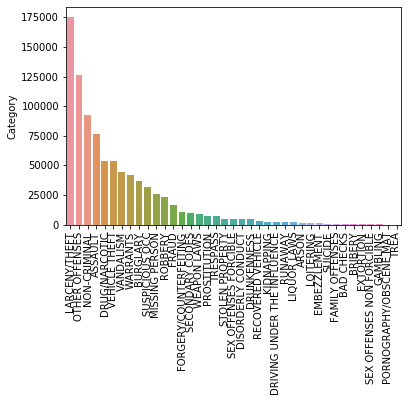

In [10]:
number_of_crimes = df_train.Category.value_counts()

_n_crime_plot = sns.barplot(x=number_of_crimes.index,y=number_of_crimes)
_n_crime_plot.set_xticklabels(number_of_crimes.index,rotation=90)

[Text(0, 0, 'LARCENY/THEFT'),
 Text(0, 0, 'OTHER OFFENSES'),
 Text(0, 0, 'NON-CRIMINAL'),
 Text(0, 0, 'ASSAULT'),
 Text(0, 0, 'DRUG/NARCOTIC'),
 Text(0, 0, 'VEHICLE THEFT'),
 Text(0, 0, 'VANDALISM'),
 Text(0, 0, 'WARRANTS'),
 Text(0, 0, 'BURGLARY'),
 Text(0, 0, 'SUSPICIOUS OCC'),
 Text(0, 0, 'MISSING PERSON'),
 Text(0, 0, 'ROBBERY'),
 Text(0, 0, 'FRAUD'),
 Text(0, 0, 'FORGERY/COUNTERFEITING'),
 Text(0, 0, 'SECONDARY CODES'),
 Text(0, 0, 'WEAPON LAWS'),
 Text(0, 0, 'PROSTITUTION'),
 Text(0, 0, 'TRESPASS'),
 Text(0, 0, 'STOLEN PROPERTY'),
 Text(0, 0, 'SEX OFFENSES FORCIBLE'),
 Text(0, 0, 'DISORDERLY CONDUCT'),
 Text(0, 0, 'DRUNKENNESS'),
 Text(0, 0, 'RECOVERED VEHICLE'),
 Text(0, 0, 'KIDNAPPING'),
 Text(0, 0, 'DRIVING UNDER THE INFLUENCE'),
 Text(0, 0, 'RUNAWAY'),
 Text(0, 0, 'LIQUOR LAWS'),
 Text(0, 0, 'ARSON'),
 Text(0, 0, 'LOITERING'),
 Text(0, 0, 'EMBEZZLEMENT'),
 Text(0, 0, 'SUICIDE'),
 Text(0, 0, 'FAMILY OFFENSES'),
 Text(0, 0, 'BAD CHECKS'),
 Text(0, 0, 'BRIBERY'),
 Text(0, 0, 'EX

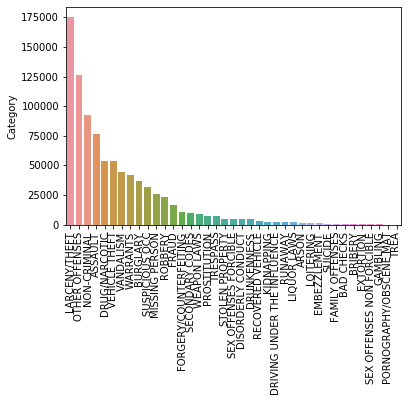

In [11]:
number_of_crimes = df_train.Category.value_counts()

_n_crime_plot = sns.barplot(x=number_of_crimes.index,y=number_of_crimes)
_n_crime_plot.set_xticklabels(number_of_crimes.index,rotation=90)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


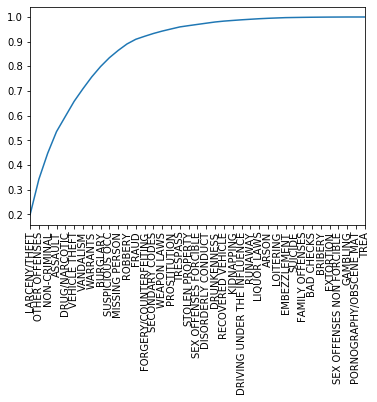

In [12]:
pareto_crime = number_of_crimes / sum(number_of_crimes)
pareto_crime = pareto_crime.cumsum()
_pareto_crime_plot = sns.tsplot(data=pareto_crime)
_pareto_crime_plot.set_xticklabels(pareto_crime.index,rotation=90)
_pareto_crime_plot.set_xticks(np.arange(len(pareto_crime)))

In [13]:
Main_Crime_Categories = list(pareto_crime[0:8].index)
print("The following categories :")
print(Main_Crime_Categories)
print("make up to {:.2%} of the crimes".format(pareto_crime[8]))

The following categories :
['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT', 'DRUG/NARCOTIC', 'VEHICLE THEFT', 'VANDALISM', 'WARRANTS']
make up to 79.92% of the crimes


In [14]:
origin_date = datetime.strptime('2003-01-01 00:00:00','%Y-%m-%d %H:%M:%S')

def delta_origin_date(dt):
    _ = datetime.strptime(dt,'%Y-%m-%d %H:%M:%S') - origin_date
    return(_.days+(_.seconds/86400))

delta_origin_date(df_train.loc[1,"Dates"])

TypeError: strptime() argument 1 must be str, not Timestamp

In [16]:
tmp = df_train.loc[:,["Dates","Category"]]
tmp["RelativeDates"]=df_train.Dates.map(delta_origin_date)
tmp.head()

TypeError: strptime() argument 1 must be str, not Timestamp